### About

In this very simple example, we would like to calculate the Higgs recoil mass on Higgsstrahlung events (e+e- ---> ZH) with Z->mumu.

### Data
Please download these files from [here](https://sas.desy.de/index.php/s/eBYsECq4sN6NGkP):
  * Signal: `E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root`
  * Background: `E250-TDR_ws.P4f_zz_sl.Gwhizard-1_95.eL.pR.I106575.001.edm4hep.root`
  
Create a folder called `data` in the root directory of this repository. Then put into separate foldes `signal`and `bgk`

### Imports

In [1]:
1+1

2

In [1]:
import ROOT
from ROOT import edm4hep
import numpy as np
import os
from os import listdir
import math

# from edm4hep_path import get_edm4hep_path
from podio.root_io import Reader

ROOT.gInterpreter.LoadFile('/cvmfs/sw.hsf.org/key4hep/releases/2024-03-10/x86_64-ubuntu22.04-gcc11.4.0-opt/edm4hep/0.10.5-4hlcr2'
+"/include/edm4hep/utils/kinematics.h")
USE_ENERGY=edm4hep.utils.detail.UseEnergyTag()

Welcome to JupyROOT 6.28/10


In [3]:
get_edm4hep_path = '/cvmfs/sw.hsf.org/key4hep/releases/2024-03-10/x86_64-ubuntu22.04-gcc11.4.0-opt/edm4hep/0.10.5-4hlcr2'


In [2]:
# filename = "/home/cinyu/ddfastshowerml2/scripts/CLD_dummyOutput_ML_Rot2_edm4hep.root"
filename_full = "/home/cinyu/ddfastshowerml2/scripts/CLD_geant4_edm4hep.root"
filename_fast = "/home/cinyu/ddfastshowerml2/scripts/CLD_fast_notracker010_edm4hep.root"

In [5]:
reader = Reader(filename_fast)

MCmorethanone = 0
for i, event in enumerate(reader.get('events')):            
    # print(event) 
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    
    if len(pIDs) != 1:
        print(pIDs)
        MCmorethanone += 1
        continue


print("#events with more than one MC particles:",MCmorethanone, "out of", len(reader.get('events')))


#events with more than one MC particles: 0 out of 100


### histograms

In [6]:
reader = Reader(filename_fast)

hist_energy = ROOT.TH1F("energy","cell energy hist",100,-2,2)

for i, event in enumerate(reader.get('events')):  
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    hit = event.get("ECalBarrelCollection")
    energies = np.array(hit.energy())
    for energy in energies:
        hist_energy.Fill(np.log10(energy)+3) # emergy in MeV for comparisonbreak



In [7]:
reader = Reader(filename_full)

hist_energy2 = ROOT.TH1F("energy","cell energy hist",100,-2,2)

for i, event in enumerate(reader.get('events')):  
    if i == 50: break
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        # print(pIDs)
        continue
    hit = event.get("ECalBarrelCollection")
    energies = np.array(hit.energy())
    for energy in energies:
        hist_energy2.Fill(np.log10(energy)+3) # emergy in MeV for comparison



Warning in <TROOT::Append>: Replacing existing TH1: energy (Potential memory leak).


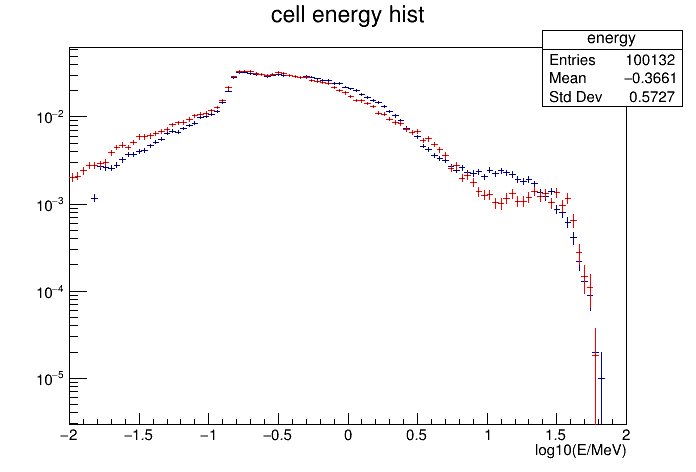

In [8]:
### Draw via ROOT
c1 = ROOT.TCanvas()
hist_energy.GetXaxis().SetTitle("log10(E/MeV)")
hist_energy.Scale(1/hist_energy.Integral())
hist_energy2.Scale(1/hist_energy2.Integral())
hist_energy2.SetLineColor(2)
hist_energy.Draw()
hist_energy2.Draw('SAME')
c1.SetLogy()
c1.Draw()


### hit position

In [57]:
reader = Reader(filename_fast)

hist_x = ROOT.TH1F("x","hit x",30,-240,240)

for i, event in enumerate(reader.get('events')): 
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    hits = event.get("ECalBarrelCollection")
    for hit in hits:
        hist_x.Fill(hit.position().z)


Warning in <TROOT::Append>: Replacing existing TH1: x (Potential memory leak).


In [58]:
reader = Reader(filename_full)

hist_x2 = ROOT.TH1F("x","hit x",30,-240,240)

for i, event in enumerate(reader.get('events')): 
    if i == 100: break
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    hits = event.get("ECalBarrelCollection")
    for hit in hits:
        hist_x2.Fill(hit.position().z)

    

Warning in <TROOT::Append>: Replacing existing TH1: x (Potential memory leak).


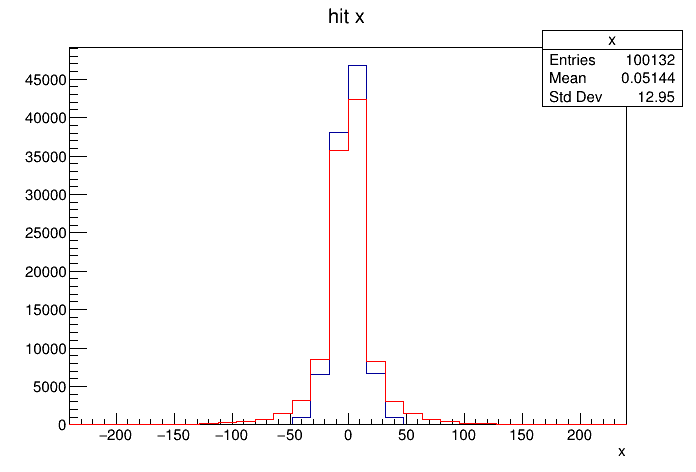

In [59]:
### Draw via ROOT
c1 = ROOT.TCanvas()
hist_x.GetXaxis().SetTitle("x")
hist_x2.SetLineColor(2)
hist_x.Draw()
hist_x2.Draw('SAME')
# c1.SetLogy()
c1.Draw()

### convert to mesh coordinates
convert the shower from global coordinals to alone the MC particle direction 

discretize coordinates

handle hits

2.999695604595478 7
5.400705959005426 13
5.777698728216206 14
3.4413527544586446 8
5.077570889315487 12
0.6269798377709352 1
5.987106820023153 15
4.4674103172578254 11
2.693893381013177 6
5.773219419682956 14
5.446222513587092 13
2.356194490192345 6
3.783655200654749 9
3.141592653589793 8
5.057570968666946 12
6.036176058055076 15
2.1587989159582364 5
5.29007290060018 13
2.947373349512244 7
3.8114987425042957 9
3.9269908169872414 10
3.141592653589793 8
2.356194490192345 6
3.9985446872187107 10
4.121048816548722 10
4.788194517432337 12
2.164080432739582 5
3.141592653589793 8
0.36094756704410985 0
4.390638435337795 11
4.514993424130866 11
2.999695604595478 7
1.4283862462609997 3
6.241475274068519 15
2.2800339680443567 5
3.9269908169872414 10
2.356194490192345 6
1.819456237651979 4
5.286795671408612 13
3.287343784133628 8
2.282412082798567 5
4.232108411413034 10
0.6049004996720281 1
4.63783032455241 11
3.841518093755342 9
4.781303733826769 12
2.2797797652188496 5
2.737049448712484 6
1.0917

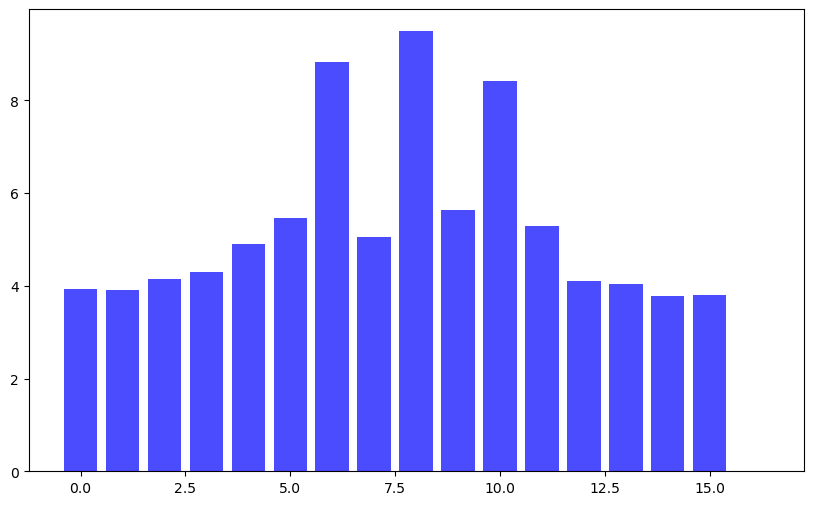

15

In [29]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

reader = Reader(filename_fast)
nCellsRho = 9 
nCellsPhi = 16  
nCellsZ = 45 
sizeOfRhoCells = 4.65 #mm
sizeOfZCells = 3.4 #mm
sizeOfPhiCells = 2 * np.pi/nCellsPhi # ? 16 phi cells therefore...

list = []
cell_ids = np.arange(nCellsPhi+1)
energies = np.zeros(len(cell_ids))

for i, event in enumerate(reader.get('events')): 
    # print(i, particle_phi)
    if i == 100: break
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    # not correct: todo calculate position from direction
    # entrancePosition = np.array([mcParticles[0].endpoint().x, mcParticles[0].endpoint().y, mcParticles[0].endpoint().z])
    entrancePosition = np.array([0, 2150, 0]) # only for direction 0 1 0
    entranceDirction = np.array([mcParticles[0].momentum().x, mcParticles[0].momentum().y, mcParticles[0].momentum().z] )
    # print(entranceDirction)
    
    # particle_r = np.linalg.norm(entranceDirction)
    # particle_theta = np.arccos(entranceDirction[2] / particle_r)
    # particle_phi = np.arctan2(entranceDirction[1], entranceDirction[0])

    # print(particle_theta, particle_phi)
    # print(particle_r, particle_theta, particle_phi) # 50 1.57 any
    # rotation matrix calculation
    # rot_matrix = R.from_euler('z', -particle_phi).as_matrix() @ R.from_euler('y', -particle_theta).as_matrix()
    # rot_matrix_inv = np.linalg.inv(rot_matrix)
    # print("rot_matrix \n", rot_matrix)
    # print(rot_matrix @ np.array([0, 1, 0])) #1,0,0

    hits = event.get("ECalBarrelCollection")
    hitsenergies= np.array(hits.energy())    
    # avoid big numbers and inf
    hitsenergies[np.isinf(hitsenergies)] = 0
    threshold = np.percentile(hitsenergies, 99)
    # print("threshold energy: ", threshold)
    mask = hitsenergies >= threshold
    hitsenergies[mask] = 0
    

    for j, hit in enumerate(hits):
        hitPosition = np.array([hit.position().x, hit.position().y, hit.position().z])
        delta = hitPosition - entrancePosition
        # calculate delta with respect to the cylinder around entrance direction + position
        localZ = np.dot(delta, entranceDirction)/np.linalg.norm(entranceDirction)
        localRho = np.sqrt(np.dot(delta, delta)-localZ*localZ)
        # print(np.linalg.norm(delta), localZ)

        # print(localRho)
        #calculate phi
        # proj = delta - entranceDirction/np.linalg.norm(entranceDirction)*localZ
        # randomdir = np.array([0,0,1])
        # sign = 1
        # if np.dot(np.cross(proj, randomdir), entranceDirction) < 0: 
        #     sign = -1 
        # localPhi = np.pi+np.arctan2(sign * np.linalg.norm(np.cross(proj, randomdir)), np.dot(proj, randomdir)) 
        
        # for now, just:
        localPhi = np.pi+np.arctan2(delta[2], delta[0])
        if delta[0] < 0.01: localPhi = np.random.rand()*2*np.pi
        # localPhi = np.random.rand()*2*np.pi
        #######?????????##########
        
        # localPhi = np.arccos(np.dot(proj, randomdir)/localRho)
        
        # 
        # if math.isnan(localPhi): localPhi = 0
        # print(localPhi)
        
        
        #? define the direction of phi as ? # in this case (global theta == 90)0,0,1 always work
        # print(delta)
        # delta = rot_matrix_inv @ delta
        # print(delta)

        # Discretize coordinates
        rho_no = int(np.floor(localRho/sizeOfRhoCells))
        z_no = int(np.floor(localZ/sizeOfZCells))
        phi_no = int(np.floor(localPhi/sizeOfPhiCells))
        list.append(phi_no)
        # print(rho_no,z_no)

        # rho_no = int(np.floor(np.linalg.norm(delta[:2]) / sizeOfRhoCells))
        # phi_no = int(np.floor((np.pi + np.arctan2(delta[1], delta[0])) / sizeOfPhiCells))
        # z_no = int(np.floor(delta[2] / sizeOfZCells))
        # print(rho_no, phi_no, z_no, hitsenergies[j])
        # list.append(phi_no)
        if rho_no > nCellsRho : print("rrr", rho_no); continue
        if phi_no > nCellsPhi: print("ppp", phi_no); continue
        if z_no > nCellsZ: print("zzz",z_no); continue

        print(localPhi, phi_no)
        energies[phi_no] += hitsenergies[j]
    # break

        
    
print(energies)
plt.figure(figsize=(10, 6))
# plt.hist(list, color='blue', alpha=0.7, edgecolor='black')
plt.bar(cell_ids, energies, color='blue', alpha=0.7)
# plt.xlabel('Cell ID')
# plt.ylabel('Total Energy')
# plt.title('Energy Distribution in Cells')
# plt.grid(True)
plt.show() 

np.array(list).max()


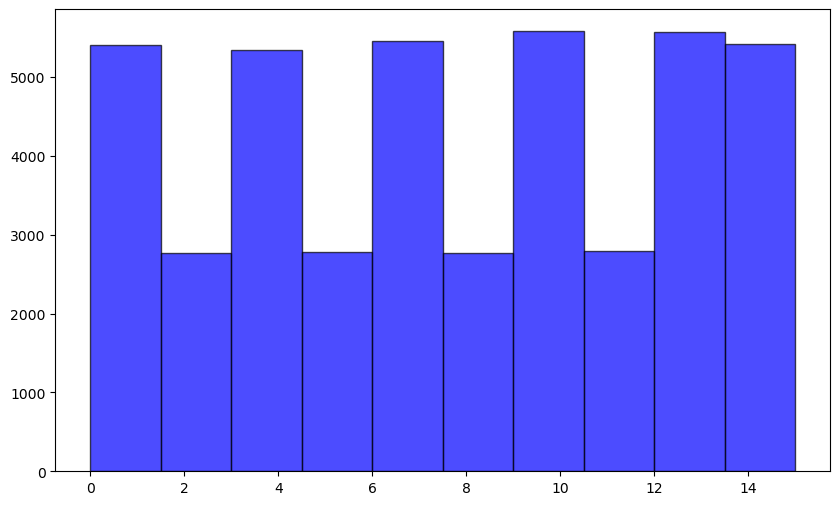

In [18]:
# print(energies)
plt.figure(figsize=(10, 6))
plt.hist(list, color='blue', alpha=0.7, edgecolor='black')
# plt.bar(cell_ids, energies, color='blue', alpha=0.7)
# plt.xlabel('Cell ID')
# plt.ylabel('Total Energy')
# plt.title('Energy Distribution in Cells')
# plt.grid(True)
plt.show() 

### Event Loop

In [ ]:
def doEvtLoop(inputfiles,nbin,xmin,xmax,histtag,title):
    
    reader = Reader(inputfiles)
    hist = ROOT.TH1F(histtag,title,nbin,xmin,xmax)

    pxinitial = 0.
    Einitial = 250. # considering resonance here
    angle = 0.007 # crossing angle parameter, change as needed

    pxinitial = Einitial*angle
    Einitial = 2.*np.sqrt((Einitial/2.)**2 + (pxinitial/2.)**2)
        
    ecms = edm4hep.LorentzVectorE(pxinitial,0.,0.,Einitial)


    for i, event in enumerate(reader.get('events')):            
        
        ## HANDS-ON!!
        # We need to get the muon collection. 
        # Then we should put a cut: Take events with exactly TWO muons
        # Use edmp4hep utils p4: This will put mu1 and mu2 into 4-vector
 
        
        # recoil mass calculations
        recoil = ecms - (mu1 + mu2)
        hist.Fill(recoil.M())
        
    return hist



### Running over samples

In [ ]:
signalDir = '../data/signal/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root'
bkgDir = '../data/bgk/E250-TDR_ws.P4f_zz_sl.Gwhizard-1_95.eL.pR.I106575.001.edm4hep.root'

sig_hist = doEvtLoop(signalDir,40,50.,250.,"signal","; mass [GeV]; ; ")
bkg_hist = doEvtLoop(bkgDir,40,50.,250.,"bkg", "; mass [GeV]; ; ")

runtime_error: void podio::ROOTReader::openFiles(const vector<string>& filenames) =>
    runtime_error: File ../data/signal/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root couldn't be found

Error in <TFile::TFile>: file /home/cinyu/tutorials/edm4hep_analysis/../data/signal/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root does not exist


### Draw via ROOT

In [ ]:
c1 = ROOT.TCanvas()
sig_hist.Draw()
hs = ROOT.THStack("hs","; mass [GeV]; ; ")
leg = ROOT.TLegend(0.5,0.6,0.9,0.9)
leg.SetHeader("ILC at 250 GeV")
sig_hist.SetFillColor(2)
leg.AddEntry(sig_hist, "Signal", "F")
bkg_hist.SetFillColor(4)
leg.AddEntry(bkg_hist, "Bkg.","F")
hs.Add(bkg_hist)
hs.Add(sig_hist)
hs.Draw()
leg.Draw()
c1.Draw()


NameError: name 'sig_hist' is not defined